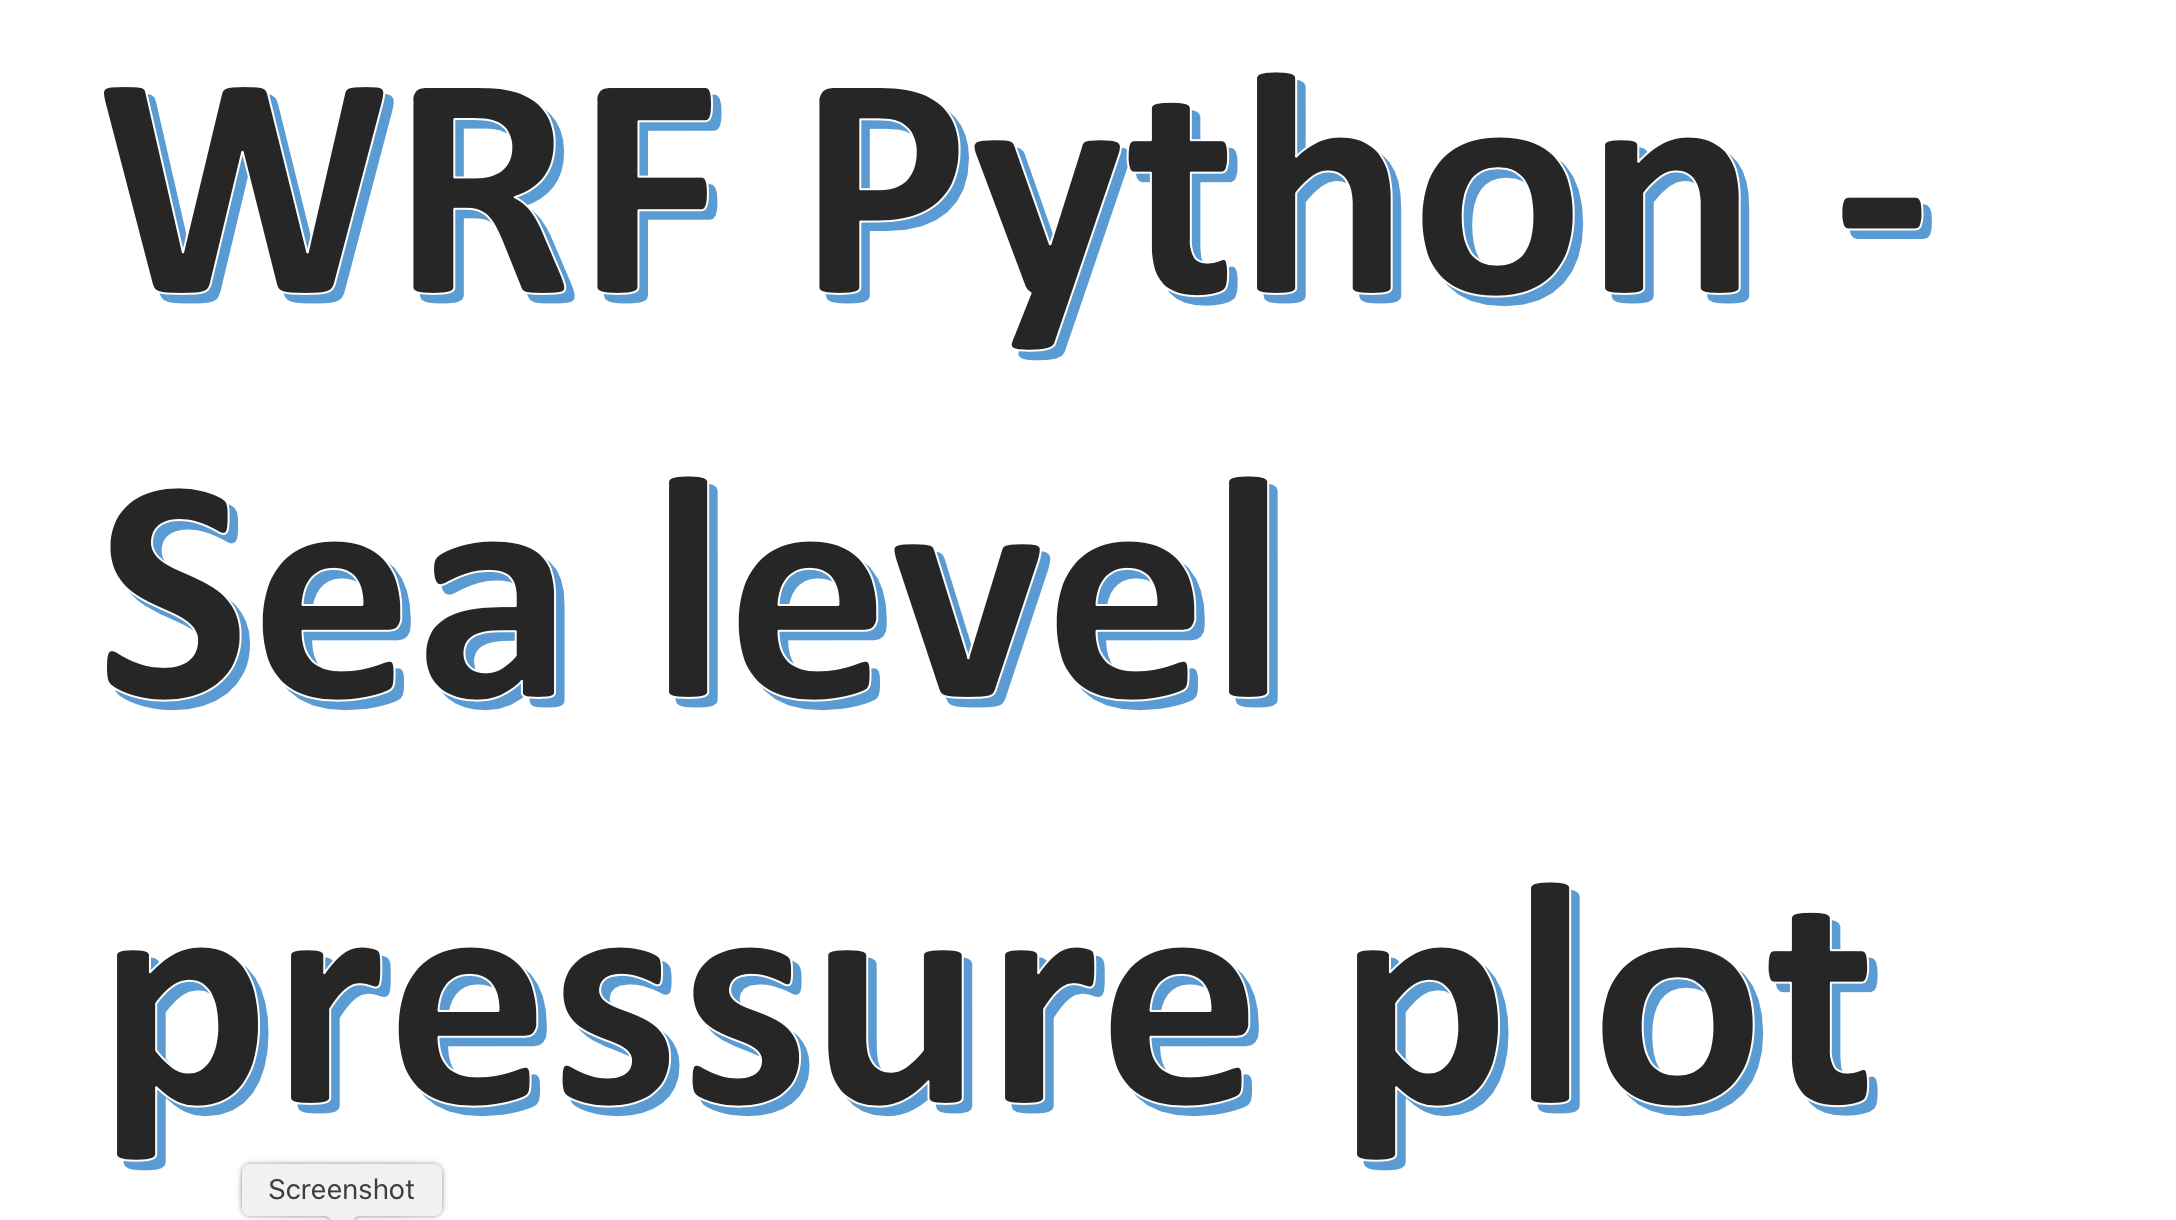

In [5]:
from IPython.display import Image
Image('07overview.png')

In this tutorial, we will learn how to plot a diagnostic variable "Sea Level Pressure" for a particular output of WRF model.
Referrence: 
https://wrf-python.readthedocs.io/en/latest/index.html

# 1. Import libraries

In [1]:
# Loading necessary libraries
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# 2. Download data

In [2]:
# specify where is the location of the data
path_in = "data/"
path_out = "./"
# Open the NetCDF file
ncfile = Dataset(path_in + 'wrfout_d01_2016-05-09_00^%00^%00')

# 3. Take out the variables

In [3]:
# Get the sea level pressure
slp = getvar(ncfile, "slp")
print(slp.dims)

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

('south_north', 'west_east')


# 4. Plotting

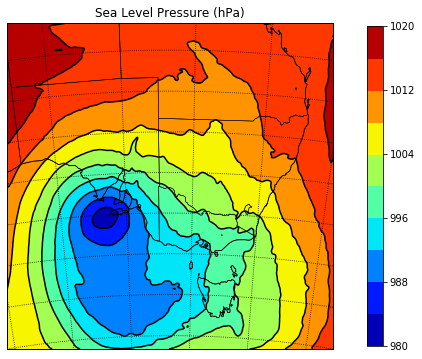

In [4]:
# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

## All done !!!
- Please feel free to let me know if there is any analysis that you would like me to do
- Please subscribe my youtube channel too
- Thank you very much